In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.facecolor'] = 'w'
from matplotlib import rc
rc('text',usetex=True)
rc('font',**{'family':'serif','serif':['Computer Modern'], 'size' : 18})
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
# rc('font',**{'family':'serif','serif':['Palatino']})
# rc('text', usetex=True)
# import matplotlib.patches as patches
# from matplotlib.colors import to_rgba

In [2]:
from time import time
def runtime(t0):
    dt = time() - t0
    if dt < 60:
        message = f'{dt:.0f} sec.'
    elif dt < 3600:
        message = f'{dt/60:.0f} min.'
    else:
        h = int(dt//3600)
        m = int((dt%3600) / 60)
        message = f'{h} h. {m} min.'
    print(message)
    
def dround(x, dec=2):
    x += 1e-9
    return float(f'{x:.{dec}f}')

# Beirut explosion

$ \frac{5}{2} \, \log R = \frac{5}{2} \, \log\left(S \sqrt[5]{\frac{E}{\rho}}\right) + \log t$

In [23]:
def get_video_frames(path):
    # save video frames and timestamps
    folder_path = '/'.join(path.split('/')[:-1])
    title = path.split('/')[-1].split('.')[0]
    import os
    folder_to = f'{folder_path}/video_frames/{title}'
    os.mkdir(folder_to)
    # use opencv to do the job
    import cv2
    vidcap = cv2.VideoCapture(path)
    cnt, ts = 0, 0
    timestamp_file = open(f'{folder_to}/timestamps.txt', 'w')
    while True:
        success,image = vidcap.read()
        timestamp_file.write(f'{cnt} \t {ts}')
        timestamp_file.write('\n')
        if not success:
            break
        cv2.imwrite(os.path.join(folder_to, f'frame{cnt}_{ts}.jpg'), image)  # save frame as JPEG file
        ts = dround(vidcap.get(cv2.CAP_PROP_POS_MSEC) / 1000, dec=3)
        cnt += 1
    print(f'{cnt} video frames extacted to {folder_to}')
    fps = vidcap.get(cv2.CAP_PROP_FPS)
    print(f'FPS = {fps}')
    # close video and output files
    vidcap.release()
    timestamp_file.close()

In [24]:
get_video_frames('data/Beirut-Explosion/Beirut-Explosion-south.mp4')

1101 video frames extacted to data/Beirut-Explosion/video_frames/Beirut-Explosion-south
FPS = 29.979577944179713


In [25]:
get_video_frames('data/Beirut-Explosion/Beirut-Explosion-east.mp4')
# 2192 video frames extacted to data/Beirut-Explosion/video_frames/Beirut-Explosion-east
# FPS = 29.97002997002997

2192 video frames extacted to data/Beirut-Explosion/video_frames/Beirut-Explosion-east
FPS = 29.97002997002997


In [22]:
# get_video_frames('data/Beirut-Explosion/Beirut-Explosion-west.mp4')
# # 1556 video frames extacted to data/Beirut-Explosion/video_frames/Beirut-Explosion-west
# # FPS = 25.0

In [53]:
get_video_frames('data/Beirut-Explosion/Beirut-Explosion-close.mp4')

523 video frames extacted to data/Beirut-Explosion/video_frames/Beirut-Explosion-close
FPS = 57.262773722627735


In [212]:
# get_video_frames('data/Beirut-Explosion/Beirut-Explosion-east-HD.mp4')
get_video_frames('data/Beirut-Explosion/Beirut-Explosion-east-4k.mp4')

225 video frames extacted to data/Beirut-Explosion/video_frames/Beirut-Explosion-east-4k
FPS = 30.0


In [3]:
# R and t values were added manually
# video from south
df1 = pd.DataFrame()
df1['D'] = [222, 286, 326, 368, 403]
df1['R'] = df1['D'] /2 * 58.6/75
df1['t'] = [11.208, 11.241, 11.274, 11.308, 11.341]
df1['t'] -= 11.174  # <- substract t=0
df1['5/2*log10_R'] = np.log10(df1['R'] ) * 5/2
df1['log10_t'] = np.log10(df1['t']) 

# video from east 4k
df2 = pd.DataFrame()
df2['D'] = [218, 304, 388, 456, 518, 557, 609]
df2['R'] = df2['D'] /2 * 54.7/105
df2['t'] = [3.400, 3.433, 3.467, 3.533, 3.600, 3.633, 3.667]
df2['t'] -= 3.367  # <- substract t=0
df2['t'] /= 2  # footage was slowed down x2
df2['5/2*log10_R'] = np.log10(df2['R'] ) * 5/2
df2['log10_t'] = np.log10(df2['t'])

# video from too close
df3 = pd.DataFrame()
df3['D'] = [150, 197, 224, 263, 272, 294, 315, 332, 342, 350]
df3['R'] = df3['D'] /2 * 62/ 69
df3['t'] = [7.282, 7.300, 7.317, 7.335, 7.352, 7.370, 7.387, 7.404, 7.422, 7.439]
df3['t'] -= 7.265  # <- substract t=0
df3['5/2*log10_R'] = np.log10(df3['R'] ) * 5/2
df3['log10_t'] = np.log10(df3['t']) 

In [4]:
np.sqrt(438**2 + 278**2)

518.7754813018827

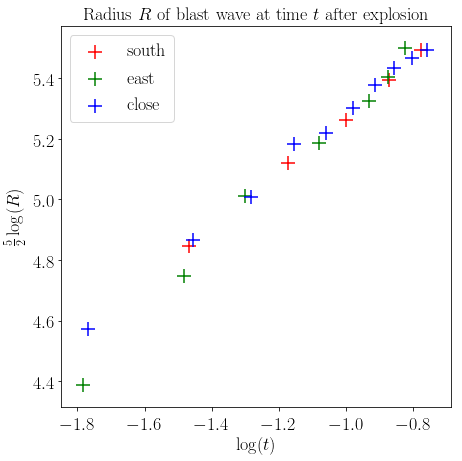

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
xmin, xmax = -4.1, -1
ymin, ymax = 7.5, 11
ax.set_title(r'Radius $R$ of blast wave at time $t$ after explosion', fontsize=18)
# ax.scatter(dfb['log10_t'], dfb['5/2*log10_R'], s=180, marker='+', color='r', label='Tw')
ax.scatter(df1['log10_t'], df1['5/2*log10_R'], s=180, marker='+', color='r', label='south')
ax.scatter(df2['log10_t'], df2['5/2*log10_R'], s=180, marker='+', color='g', label='east')
ax.scatter(df3['log10_t'], df3['5/2*log10_R'], s=180, marker='+', color='b', label='close')
ax.set_xlabel(r'$\log(t)$', fontsize=18)
ax.set_ylabel(r'$\frac{5}{2}\log(R)$', fontsize=18)
ax.legend()
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18);
# fig.savefig('plots/BlastWaveRadius.pdf', bbox_inches='tight')

In [9]:
df = pd.concat([df1, df2, df3], axis=0).reset_index(drop=True)

In [10]:
df

,D,R,t,5/2*log10_R,log10_t
0,222,86.728000,0.0340,4.845398,-1.468521
1,286,111.730667,0.0670,5.120431,-1.173925
2,326,127.357333,0.1000,5.262560,-1.000000
3,368,143.765333,0.1340,5.394135,-0.872895
4,403,157.438667,0.1670,5.492779,-0.777284
5,218,56.783810,0.0165,4.385561,-1.782516
6,304,79.184762,0.0330,4.746604,-1.481486
7,388,101.064762,0.0500,5.011499,-1.301030
8,456,118.777143,0.0830,5.186832,-1.080922
9,518,134.926667,0.1165,5.325244,-0.933674


(22,) (22, 1)
R^2 = 0.98


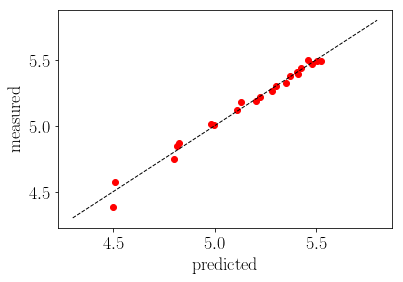

In [12]:
X = df['log10_t'].values.reshape(1, -1).T
y = df['5/2*log10_R'].values
print(y.shape, X.shape)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
model = LinearRegression()
model.fit(X, y)
yhat = model.predict(X)

print(f'R^2 = {r2_score(yhat, y):.2f}')
plt.scatter(yhat, y, color='r')
line2 = np.linspace(4.3, 5.8)
plt.xlabel('predicted')
plt.ylabel('measured')
plt.plot(line2, line2, 'k--', linewidth=1);

In [18]:
intercept, slope = model.intercept_, model.coef_[0]
intercept, slope

(6.286468556173189, 1.0040721707107543)

In [17]:
# # optimization fot fitting the constant factor only
# from scipy.optimize import fsolve
# def loss(i, slope=1):
#     """Fixed slope 1-deg polynomial residuals"""
#     return ((y2 - (slope*X2 + i))**2).sum()

# np.polyfit(df2['log10_t'].values, y2, 1)
# intercept = fsolve(loss, x0=1)[0]
# intercept

In [19]:
r2_beirut = r2_score(X + intercept, y)
r2_beirut

0.9846155818708071

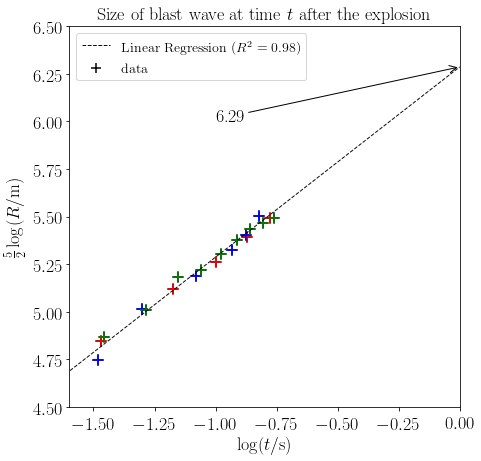

In [43]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
xmin, xmax = -1.6, 0
ymin, ymax = 4.5, 6.5 #9.5, 11.5
ax.set_title(r'Size of blast wave at time $t$ after the explosion', fontsize=18)
# Beirut
ax.scatter(df['log10_t'], df['5/2*log10_R'], s=100, marker='+', color='k', label='data', zorder=0)
ax.scatter(df1['log10_t'], df1['5/2*log10_R'], s=150, marker='+', color='r', label='')
ax.scatter(df2['log10_t'], df2['5/2*log10_R'], s=150, marker='+', color='b', label='')
ax.scatter(df3['log10_t'], df3['5/2*log10_R'], s=150, marker='+', color='g', label='')
# ax.scatter(df2['log10_t'], df2['5/2*log10_R'], s=150, marker='+', color='b', zorder=1)
logt2 = np.linspace(-5, 0, 2)
ax.plot(logt2, intercept + logt2, 'k--', linewidth=1, 
        label=f'Linear Regression ($R^2 = {r2_beirut:.2f}$)', zorder=1, alpha=0.95)

ax.annotate(f'{intercept:.2f}', xy=(0, intercept), xytext=(-1, 6), arrowprops=dict(facecolor='black', arrowstyle='->'))

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_xlabel(r'$\log(t/\mathrm{s})$', fontsize=18)
ax.set_ylabel(r'$\frac{5}{2}\log(R/\mathrm{m})$', fontsize=18)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.legend(fontsize=14, loc='upper left');
fig.savefig('plots/BlastWaveSize_Beirut3.pdf', bbox_inches='tight')

In [21]:
# joules to kt of TNT
j2kt = 1/4.18e12

In [22]:
E_J = 10**(intercept * 2/5 * 5) * 1.25 * 0.856 
print(f'energy = {E_J:.2e} J')

energy = 4.00e+12 J


In [23]:
print(f'energy = {E_J* j2kt:.3f} kt')

energy = 0.958 kt


ammnium nitrate explosive heat: 1447.7 J/g (Review on Thermal Decomposition of Ammonium Nitrate,  Journal of Energetic Materials, Volume 31, pp. 1-26, 2013)

In [48]:
print(f'energy = {1447.7/1e-3 * 2750e3 * 1/4.18e12:.3f}')

energy = 0.952
